# Table of Contents

1. Missing Value Ratio

2. Low Variance Filter

3. High Correlation Filter

4. Random Forest

5. Backward Feature Elimination

6. Forward Feature Selection

7. Factor Analysis

8. Principal Component Analysis

9. Independent Component Analysis

10. Methods Based on Projections

11. t-Distributed Stochastic Neighbor Embedding (t-SNE)

12. UMAP

Applications of Various Dimensionality Reduction Techniques

### From here: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/?

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data
train=pd.read_csv("train_kOBLwZA.csv")
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1. Missing Value Ratio

Suppose you’re given a dataset. What would be your first step? You would naturally want to explore the data first before building model. While exploring the data, you find that your dataset has some missing values. Now what? You will try to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.


In [8]:
# checking the percentage of missing values in each variable
print(train.isnull().sum()/len(train)*100)

# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])
        
# variable is the list that has miss data less the threshold (20% in this example)
print(variable)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


# 2 Low Variance Filter

Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

Let’s first impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values:

In [12]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
# check the missing value again
print(train.isnull().sum()/len(train)*100)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


In [24]:
# show variance
print(train.var())

# implenment the variance filter
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64


# 3. Correlation filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

Let’s perform the correlation calculation in Python. We will drop the dependent variable (Item_Outlet_Sales) first and save the remaining variables in a new dataframe (df).

We don’t have any variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [34]:
df=train.drop('Item_Outlet_Sales', 1)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


# 4. Random Forest

Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

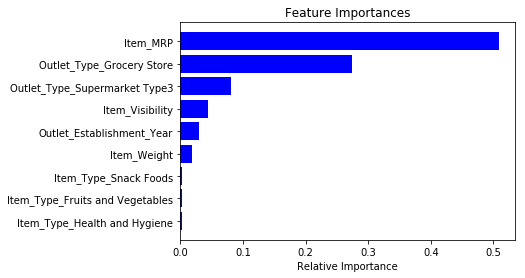

In [52]:
from sklearn.ensemble import RandomForestRegressor

df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
df=pd.get_dummies(df)

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,train.Item_Outlet_Sales)

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. Alernatively, we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.



In [42]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

ValueError: could not convert string to float: FDA15

# 5. Backward Feature Elimination

Follow the below steps to understand and use the ‘Backward Feature Elimination’ technique:

We first take all the n variables present in our dataset and train the model using them We then calculate the performance of the model

Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables

We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable Repeat this process until no variable can be dropped

### This method can be used when building Linear Regression or Logistic Regression models. 

In [53]:
#  recursive feature elimination (RFE) 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(df, train.Item_Outlet_Sales)

In [56]:

# importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# read the data
train = pd.read_csv('train_kOBLwZA.csv')
train=pd.get_dummies(train)

print(train.head())


# seperate the target and independent variable
X = train.drop(columns = ['Item_Outlet_Sales'],axis=1)
Y = train['Item_Outlet_Sales']


# create the object of the model
lreg = LinearRegression()


# specify the number of  features to select 
rfe = RFE(lreg, 10)

# fit the model
rfe = rfe.fit(X, Y)

print('\n\nFEATUERS SELECTED\n\n')
print(rfe.support_)

print('\n\nRANKING OF FEATURES\n\n')
print(rfe.ranking_)

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Identifier_DRA12  Item_Identifier_DRA24  \
0          3735.1380                      0                      0   
1           443.4228                      0                      0   
2          2097.2700                      0                      0   
3           732.3800                      0                      0   
4           994.7052                      0                      0   

   Item_Identifier_DRA59  Item_Identifier_DRB01  Item_Identifier_DRB13  \
0                      0                      0                      0  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# 6. Forward Feature Selection
This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

We start with a single feature. Essentially, we train the model n number of times using each feature separately

The variable giving the best performance is selected as the starting variable

Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained

We repeat this process until no significant improvement is seen in the model’s performance

In [57]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df,train.Item_Outlet_Sales )

variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df.columns[i])
    
    

This gives us the top most variables based on the forward feature selection algorithm.

### NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive.They are practically only used on datasets that have a small number of input variables.

The techniques we have seen so far are generally used when we do not have a very large number of variables in our dataset. These are more or less feature selection techniques. In the upcoming sections, we will be working with the Fashion MNIST dataset, which consists of images belonging to different types of apparel, e.g. T-shirt, trousers, bag, etc. The dataset can be downloaded from the “IDENTIFY THE APPAREL” practice problem.

The dataset has a total of 70,000 images, out of which 60,000 are in the training set and the remaining 10,000 are test images. For the scope of this article, we will be working only on the training images. The train file is in a zip format. Once you extract the zip file, you will get a .csv file and a train folder which includes these 60,000 images. The corresponding label of each image can be found in the ‘train.csv’ file.

# 7. Factor Analysis
Suppose we have two variables: Income and Education. These variables will potentially have a high correlation as people with a higher education level tend to have significantly higher income, and vice versa.

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.

Let’s first read in all the images contained in the train folder:

In [59]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
images = [cv2.imread(file) for file in glob('train/*.png')]

images = np.array(images)
images.shape

image = []
for i in range(0,60000):
    img = images[i].flatten()
    image.append(img)
image = np.array(image)

train = pd.read_csv("train.csv")     # Give the complete path of your train.csv file
feat_cols = [ 'pixel'+str(i) for i in range(image.shape[1]) ]
df = pd.DataFrame(image,columns=feat_cols)
df['label'] = train['label']

from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])
